## Serial LETK Filtering


In [1]:
import Simulator
import Observation
import Statistics

import KalmanFilter
import ETKalmanFilter
import SLETKalmanFilter

import Comparer

## Loading simulator 

For Kalman filtering we have to be able to propagate a Gaussian distribution in time and to have access to the linear operators

In [2]:
timestamp = "2021_08_11-14_10_29"

grid, simulator = Simulator.from_file(timestamp)

## Loading observations 

Observation positions which are fixed for a setup and values from the truth

In [3]:
obs_timestamp = "2021_08_11-14_10_37"
observation = Observation.from_file(grid, timestamp, obs_timestamp)

Remember to set observation positions and to set/observe values!


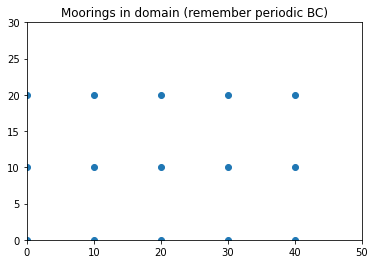

In [4]:
observation.plot_positions()

## Definition of initial distribution 

The inital state is equipped with a Gaussian distribution specified by its mean and covariance. 

In [5]:
prior_args = Statistics.prior_args_from_file(timestamp)

## Kalman filtering

Updating/conditioning the distributions at every observation time

Please remember to set priors!


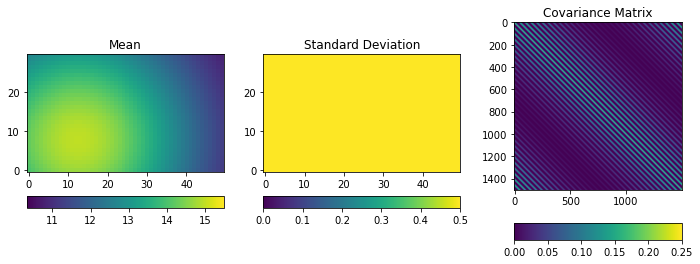

In [6]:
statistics_kf = Statistics.Statistics(simulator)
statistics_kf.set_prior(prior_args)

statistics_kf.plot()

0


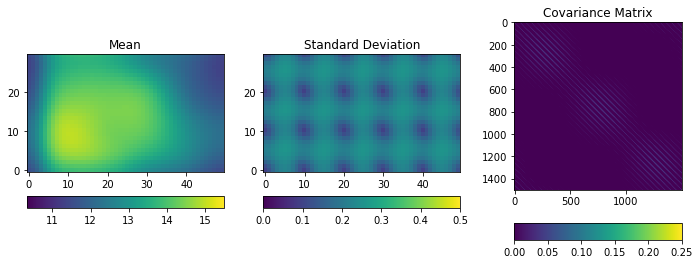

1


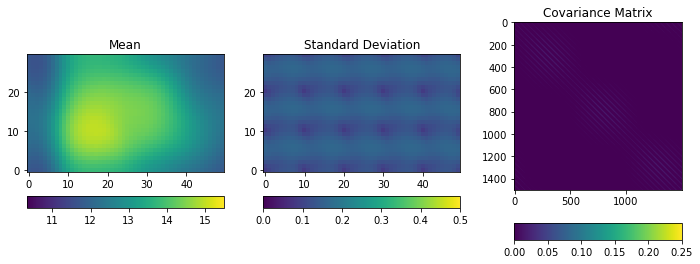

2


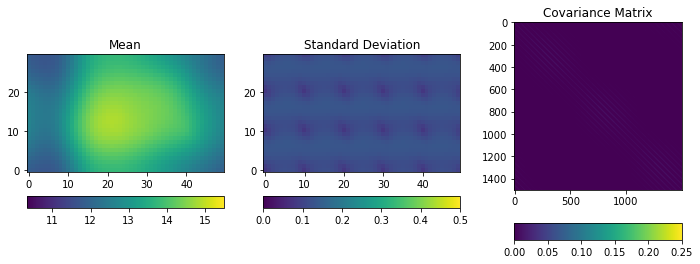

3


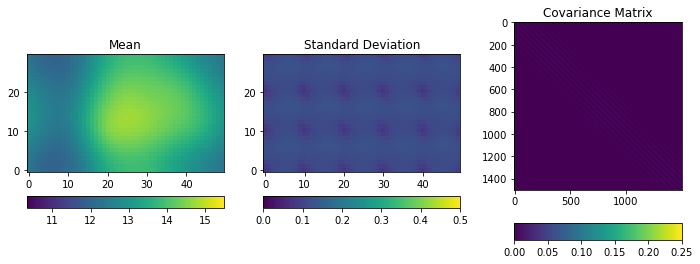

4


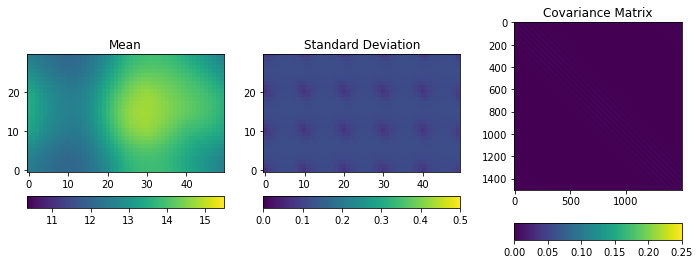

5


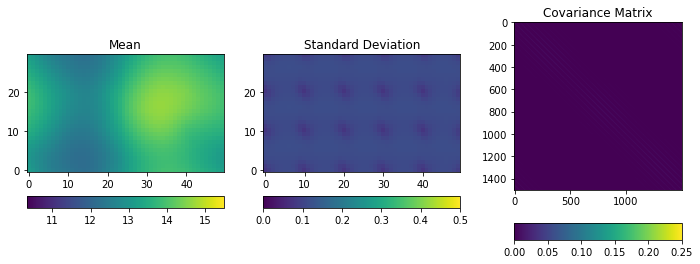

6


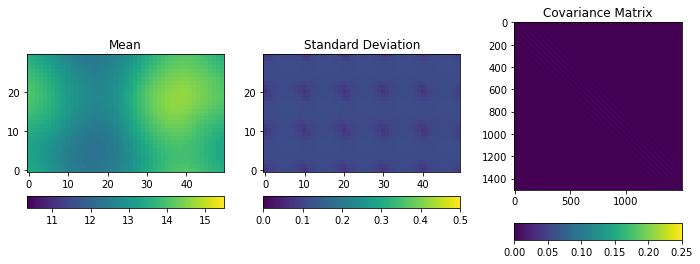

7


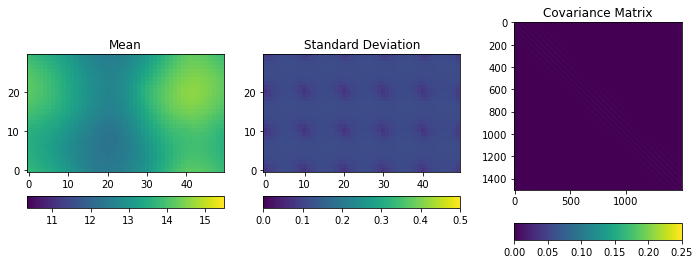

8


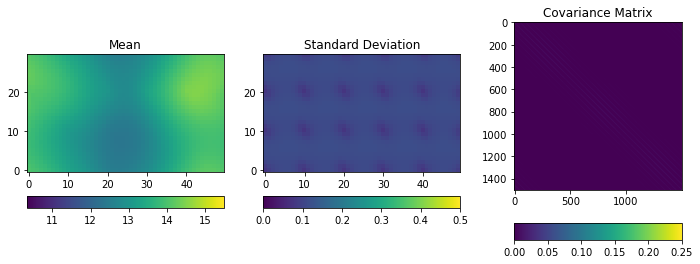

9


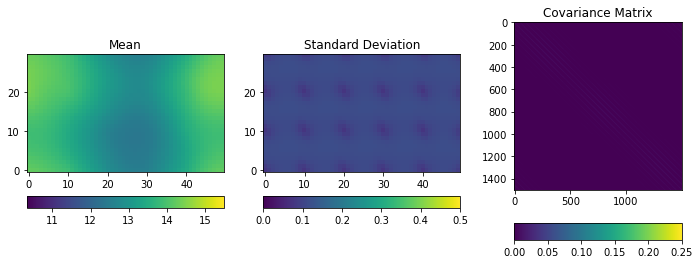

In [7]:
kalmanFilter = KalmanFilter.Kalman(statistics_kf, observation)

for t in range(observation.N_obs):
    print(t)
    statistics_kf.propagate(25)
    kalmanFilter.filter(statistics_kf.mean, statistics_kf.cov, observation.obses[t])
    statistics_kf.plot()

## ETKF filtering

Updating/conditioning the distributions at every observation time

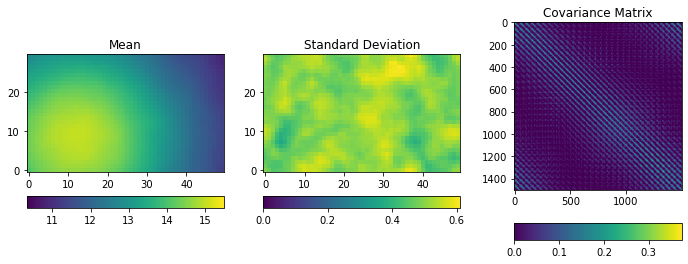

In [8]:
statistics_etkf = Statistics.Statistics(simulator, 100)
statistics_etkf.set_prior(prior_args)

statistics_etkf.plot()

0


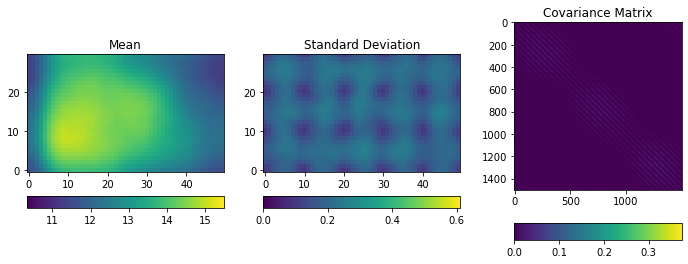

1


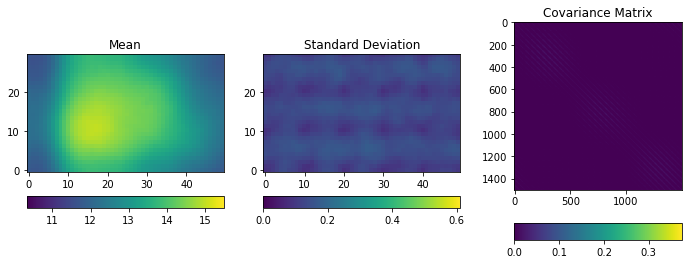

2


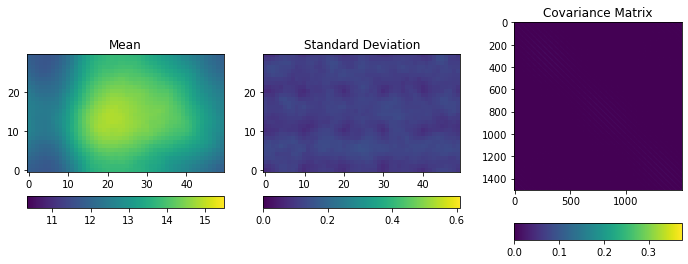

3


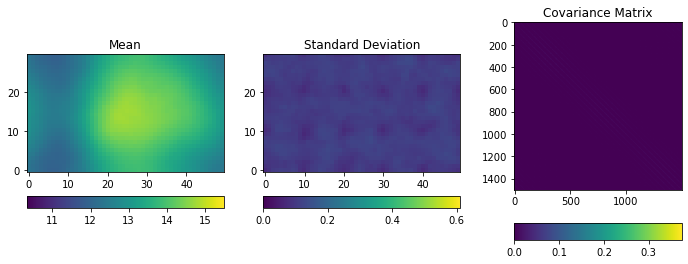

4


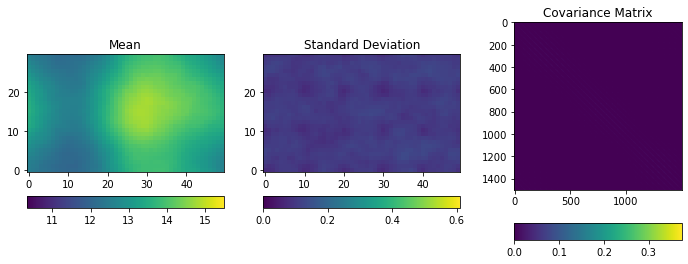

5


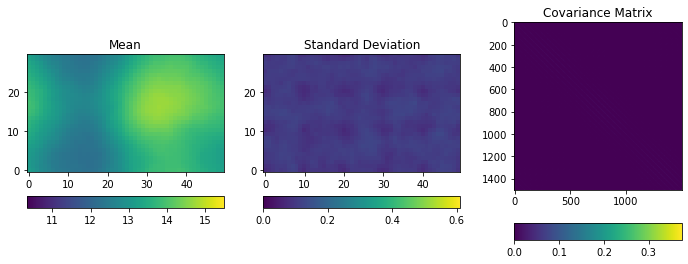

6


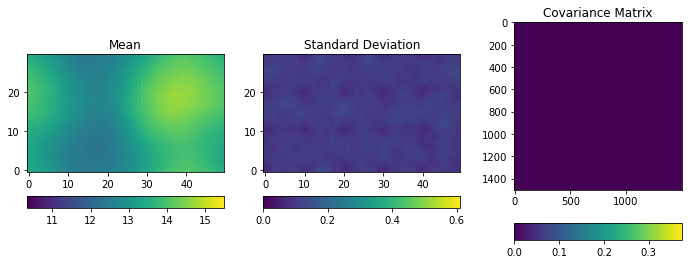

7


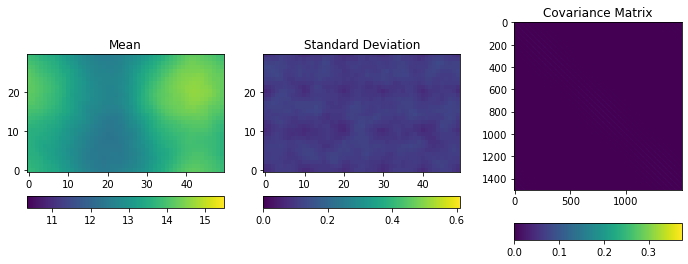

8


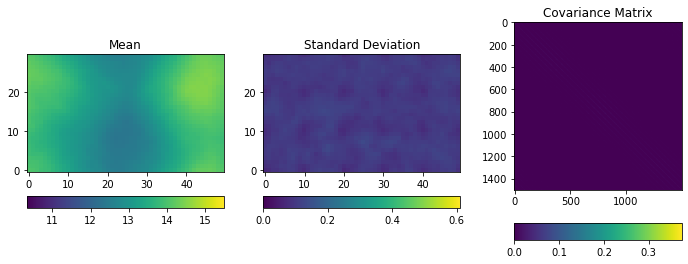

9


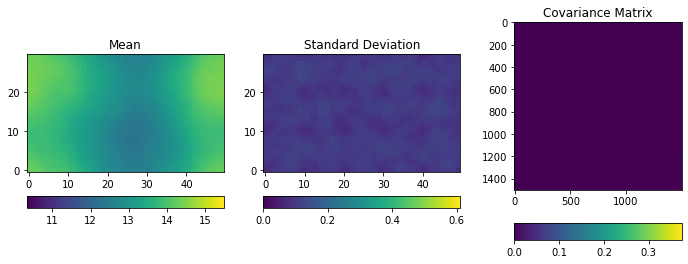

In [9]:
etkFilter = ETKalmanFilter.ETKalman(statistics_etkf, observation)

for t in range(observation.N_obs):
    print(t)
    statistics_etkf.propagate(25)
    etkFilter.filter(statistics_etkf.ensemble.ensemble, observation.obses[t])
    statistics_etkf.plot()

## LETKF filtering

Updating/conditioning the distributions at every observation time

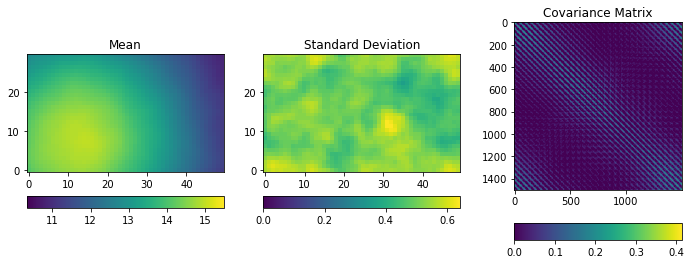

In [10]:
statistics_letkf = Statistics.Statistics(simulator, 100)
statistics_letkf.set_prior(prior_args)

statistics_letkf.plot()

In [11]:
# We choose the scale_r as about 2/3 of the correlation length in grid cells 
scale_r = 8

In [12]:
sletkFilter = SLETKalmanFilter.SLETKalman(statistics_letkf, observation, scale_r)

In [13]:
sletkFilter.groups

[[0, 2, 6, 8, 14], [1, 4, 5, 7, 13], [11, 3, 9], [10, 12]]

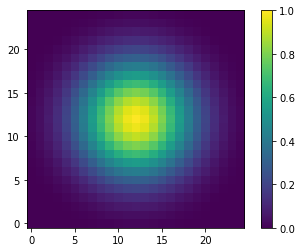

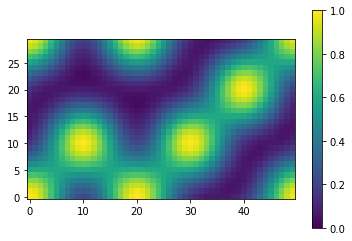

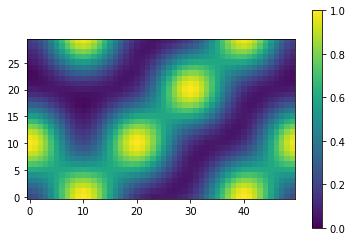

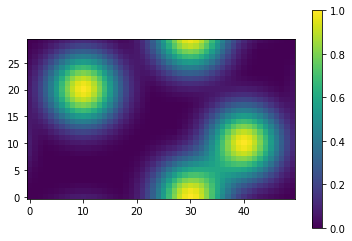

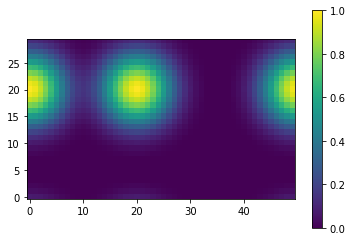

In [14]:
from matplotlib import pyplot as plt
plt.imshow(sletkFilter.W_loc, origin="lower", vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()
for g in range(len(sletkFilter.groups)):
    plt.imshow(sletkFilter.W_analyses[g], origin="lower", vmin=0.0, vmax=1.0)
    plt.colorbar()
    plt.show()

0


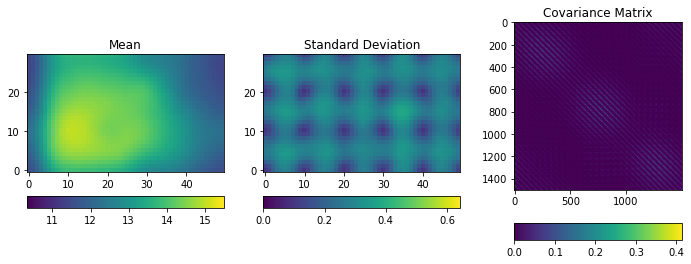

1


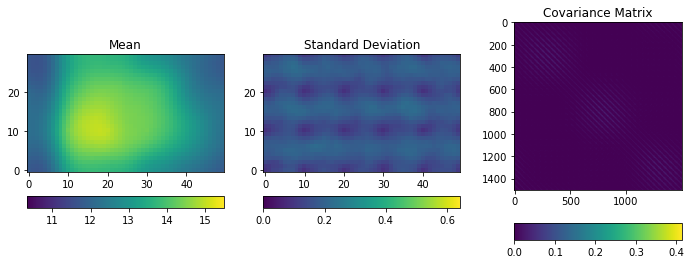

2


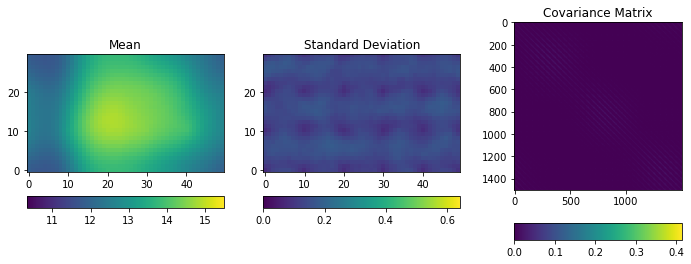

3


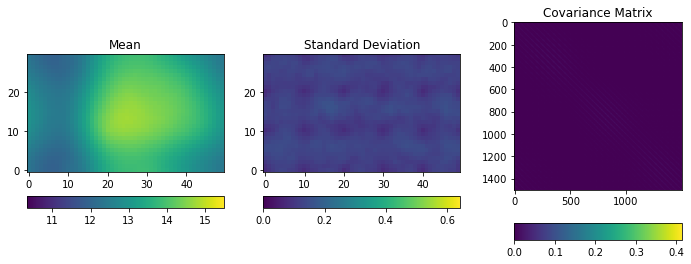

4


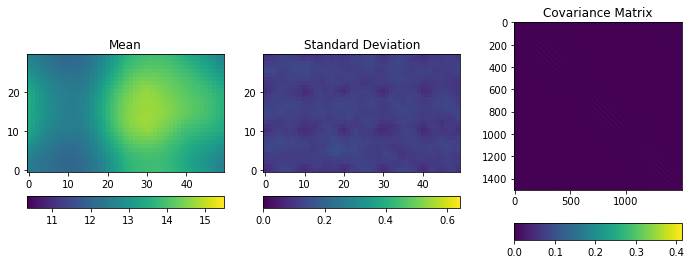

5


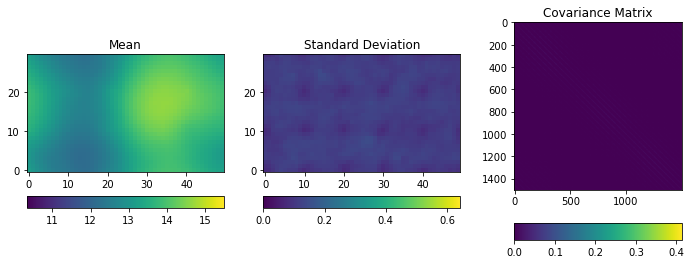

6


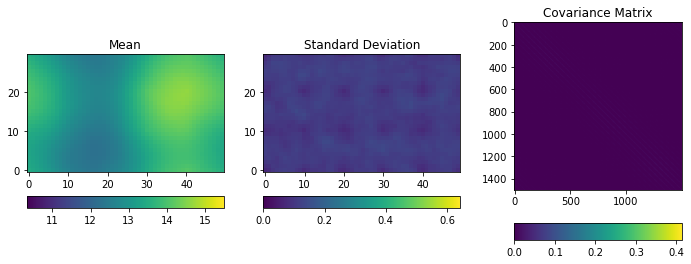

7


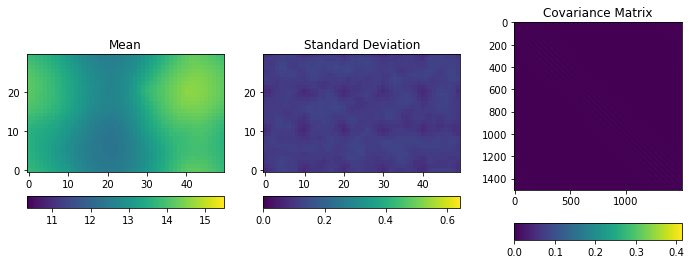

8


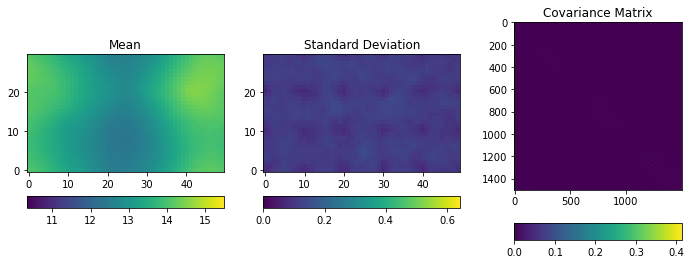

9


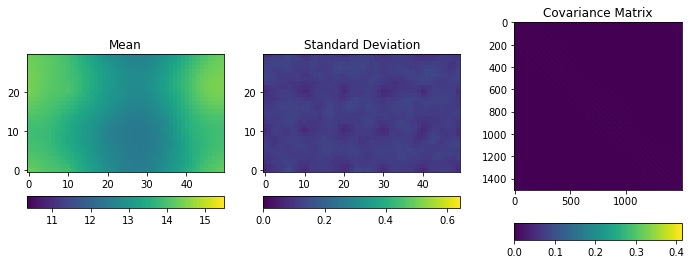

In [15]:
for t in range(observation.N_obs):
    print(t)
    statistics_letkf.propagate(25)
    sletkFilter.filter(statistics_letkf.ensemble.ensemble, observation.obses[t])
    statistics_letkf.plot()

## Comparison

In [16]:
from importlib import reload  
reload(Comparer)


<module 'Comparer' from 'c:\\Users\\florianb\\Documents\\advectionDiffusion\\Comparer.py'>

In [17]:
comparer = Comparer.Comparer(statistics_kf, statistics_etkf, statistics_letkf)

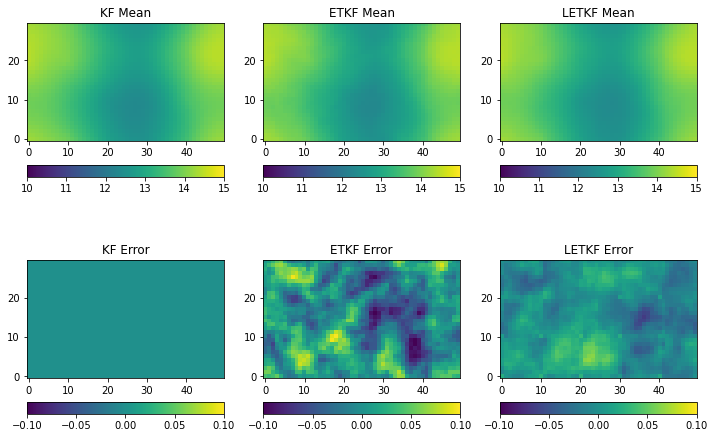

In [18]:
comparer.mean_plots()

In [19]:
mean_rmse_kf, mean_rmse_etkf, mean_rmse_letkf = comparer.mean_rmse()

print("RMSE of KF = ", mean_rmse_kf)
print("RMSE of ETKF = ", mean_rmse_etkf)
print("RMSE of LETKF = ",mean_rmse_letkf)

RMSE of KF =  0.0
RMSE of ETKF =  1.4004606565571542
RMSE of LETKF =  0.7847019070402096


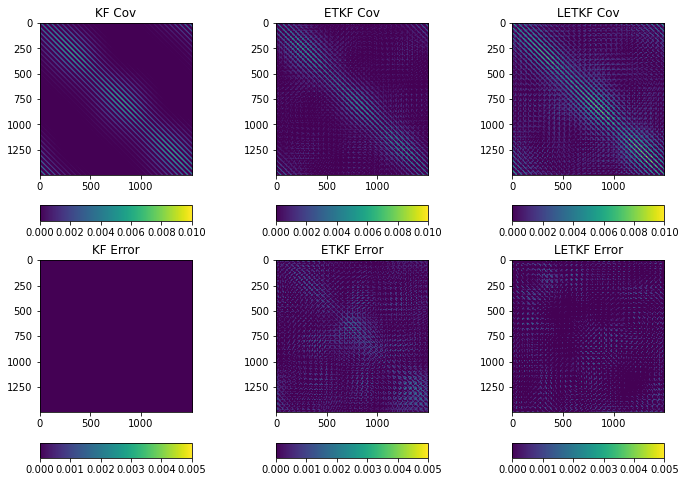

In [20]:
comparer.cov_plots()

In [21]:
cov_frob_kf, cov_frob_etkf, cov_frob_letkf = comparer.cov_frobenius_dist()

print("Frobenius error in Cov matrix (KF) = ", cov_frob_kf)
print("Frobenius error in Cov matrix (ETKF) = ", cov_frob_etkf)
print("Frobenius error in Cov matrix (LETKF) = ", cov_frob_letkf)

Frobenius error in Cov matrix (KF) =  0.0
Frobenius error in Cov matrix (ETKF) =  1.6346443964686996
Frobenius error in Cov matrix (LETKF) =  2.076494201891733


In [22]:
reload(Comparer)
comparer = Comparer.Comparer(statistics_kf, statistics_etkf,statistics_letkf)

In [23]:
comparer.set_poi([0,0])
comparer.set_poi([15,25])

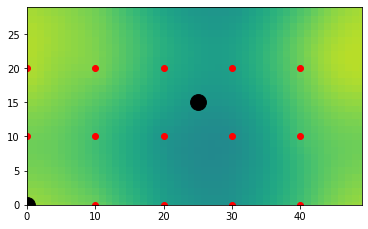

In [24]:
comparer.poi_plot(observation)

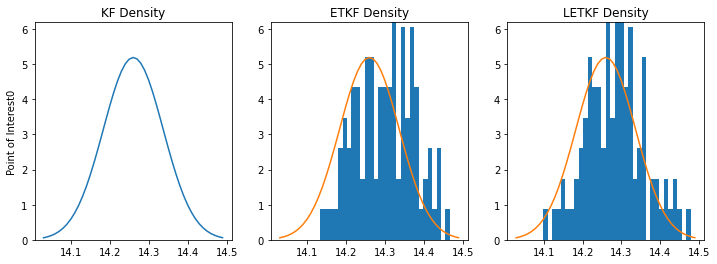

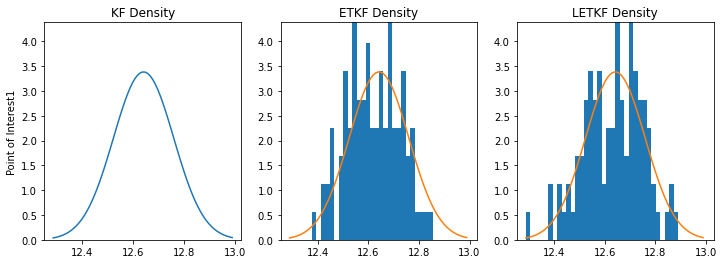

In [25]:
comparer.poi_hist(0)
comparer.poi_hist(1)

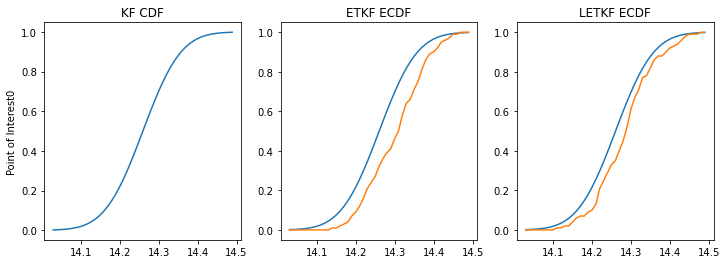

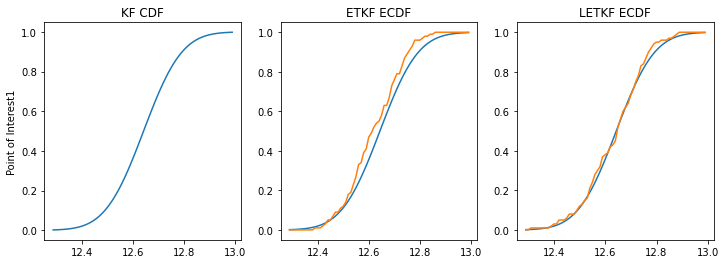

In [26]:
comparer.poi_ecdf_plots(0)
comparer.poi_ecdf_plots(1)

In [27]:
ecdf_err_etkf, ecdf_err_letkf = comparer.poi_ecdf_err(0)

print("Difference at pos0 (ETKF) = ", ecdf_err_etkf)
print("Difference at pos0 (LETKF) = ",ecdf_err_letkf)

ecdf_err_etkf, ecdf_err_letkf = comparer.poi_ecdf_err(1)

print("Difference at pos1 (ETKF) = ", ecdf_err_etkf)
print("Difference at pos1 (LETKF) = ",ecdf_err_letkf)

c:\Users\florianb\Documents\advectionDiffusion\Comparer.py:231: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  ecdf_err_etkf = scipy.integrate.quad(diff_etkf, xmin, xmax, limit=100)[0]
c:\Users\florianb\Documents\advectionDiffusion\Comparer.py:232: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splittin

Difference at pos1 (ETKF) =  0.04138911790619555
Difference at pos1 (LETKF) =  0.024568040782959915
Difference at pos1 (ETKF) =  0.026079858678221355
Difference at pos1 (LETKF) =  0.009686977539396955
